In [1]:
#packages import
import os
os.chdir('..') #cd to PiperNET folder

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.rnaseq_utils import get_config
from src.rnaseq_utils import reorder_tissues

plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
#import proteomes
config = Path('config/rnaseq_dataprep.yaml')
proteome_list = get_config(config, data='rna-seq', file='proteome_csv')

for sample, path in proteome_list.items(): 
    proteome_list[sample] = pd.read_csv(path, index_col='id') #update proteome_list with dfs

In [11]:
piper23 = proteome_list['piper23']
piper09

Pfim_g10_i0.p2

g10_i0.p2

,sequence,length,orf_type,orientation,orf_score,transcript_length,transcript_coverage,pfam,domain,pfam_e-value,...,topology,P09_leaf_rep1,P09_leaf_rep2,P09_leaf_rep3,P09_root_rep1,P09_root_rep2,P09_root_rep3,P09_stem_rep1,P09_stem_rep2,P09_stem_rep3
id,,,,,,,,,,,,,,,,,,,,,
Pfim_g58324_i0.p2,MADDKDKMDKMMKQLNVTLSSEDAELKEKALLKAVMRKWIPASDAI...,132,3prime_partial,(+),12.72,435,1.320442,NaN,NaN,NaN,...,i,0.000,0.709,0.000,0.000,0.000,0.000,0.000,0.000,0.725
Pfim_g58325_i0.p1,VQTHNYDLILMDVCMPVMDGLKATRIIRSFEETGNWDAATEAGIEK...,112,5prime_partial,(+),22.77,435,1.276243,PF00072.28,Response regulator receiver domain,1.800000e-15,...,o,0.000,0.000,0.000,1.409,0.000,0.000,0.000,0.000,0.000
Pfim_g58327_i0.p1,DILSLGINVLELSLLNSTVFKSSVLTLNSALSIPFKLWNFYSNSTN...,145,internal,(-),1.32,435,1.276243,NaN,NaN,NaN,...,o129-144,0.694,0.709,0.732,0.000,0.000,0.000,0.000,0.000,0.000
Pfim_g58329_i0.p1,LKTEKKLFWPKIKKVNVQVSFNPENKQKGILLTGSKTEVLKAVDIV...,144,internal,(+),24.13,435,1.276243,NaN,NaN,NaN,...,o,2.083,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Pfim_g58332_i0.p1,TFLILMLIPPFTFFGCFFLPIAVGCSIVGAYCIAWLAYLSFAQTDR...,144,internal,(-),2.80,435,1.273481,NaN,NaN,NaN,...,i12-34o66-88i134-143,0.000,0.000,0.000,0.939,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pfim_g58322_i0.p1,RLTRASKVLEQLTGQTPVTAKARYTVRTFGIRRNEKIAVHVTVRGE...,144,internal,(-),0.00,435,1.334254,PF00673.25,ribosomal L5P family C-terminus,2.900000e-20,...,o,0.000,0.709,0.000,0.000,0.000,0.000,0.000,0.716,1.450
Pfim_g3893_i0.p1,MDTLFSGVRFVLIGFDSVSEAQYRSEIVNAGGVDVGRYDASCTHVI...,1164,complete,(+),227.49,3913,14.717969,PF12738.11,twin BRCT domain,4.900000e-23,...,o,0.055,0.195,0.110,0.464,0.070,0.129,4.194,1.956,0.737
Pfim_g46_i3.p3,MPATSNSSSPSTLSFITSSLLLIILPLLVIAVLVVVLRPGPSSFSF...,314,complete,(-),54.54,7380,340.006158,PF03016.19,Exostosin family,9.600000e-16,...,o14-36i,8.099,5.562,5.914,15.142,13.619,13.802,9.491,8.588,10.878


In [3]:
#Piper23
piper23 = proteome_list['piper23']
pks = piper23[piper23['pfam'].str.contains('PF00195|PF02797', na=False)] #keep 'PF00195' or 'PF02797
tpm_cols = [col for col in pks.columns if 'rep' in col]
tpm = pks[tpm_cols] #keep only tpm columns
tissues = pd.Series(tpm.columns).str.split('_').str[-2].unique().tolist() #extract tissue names

#calculate mean tpm for each tissue
mapping = {col: col.split('_')[1] for col in tpm.columns} #map column names to tissue type
tpm = tpm.groupby(mapping, axis=1).mean().round(2) #groupby along columns
tpm = tpm[reorder_tissues(tpm.columns)] #reoder tissues

#replace tpm data with average tpm
pks = pks.drop(columns=tpm_cols)
pks = pks.merge(tpm, left_index=True, right_index=True)

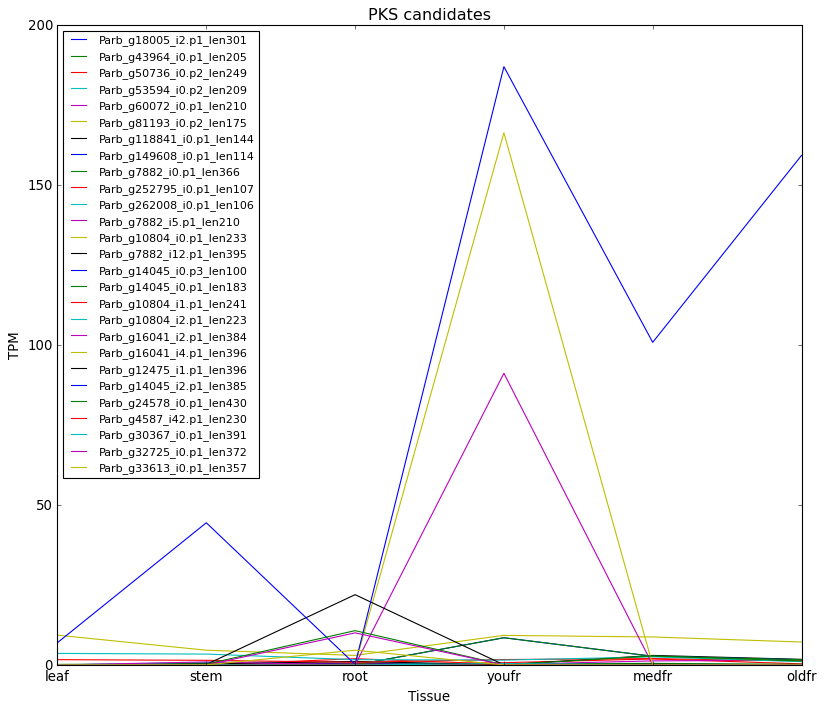

In [5]:

data = tpm[reorder_tissues(tissues)].transpose() #transpose data

#line plot for each row
plt.figure(figsize=(12, 10))
for i in range(len(data.columns)):
    data.iloc[:, i].plot()


labels = [f'{label}_len{pks.loc[label, "length"]}' for label in data.columns]

plt.legend(labels, loc='best', fontsize='small') #data.columns
plt.title('PKS candidates')
plt.xlabel('Tissue')
plt.ylabel('TPM')
plt.show()

In [ ]:
#mean TPM range
print('TPM mean range Leaf:', mean_df['leaf_mean'].min(), '-', round(mean_df['leaf_mean'].max(),1))
print('TPM mean range Root:', mean_df['root_mean'].min(), '-', round(mean_df['root_mean'].max(),1))
print('TPM mean range Stem:', mean_df['stem_mean'].min(), '-', round(mean_df['stem_mean'].max(),1))
print('TPM mean range YoungFruit: ', mean_df['youfr_mean'].min(), '-', round(mean_df['youfr_mean'].max(),1))
print('TPM mean range MedFruits:', mean_df['medfr_mean'].min(), '-', round(mean_df['medfr_mean'].max(),1))
print('TPM mean range OldFruits:', mean_df['oldfr_mean'].min(), '-', round(mean_df['oldfr_mean'].max(),1))

print('\n')

#std TPM range
print('TPM std range Leaf:', std_df['leaf_std'].min(), '-', round(std_df['leaf_std'].max(),1))
print('TPM std range Root:', std_df['root_std'].min(), '-', round(std_df['root_std'].max(),1))
print('TPM std range Stem:', std_df['stem_std'].min(), '-', round(std_df['stem_std'].max(),1))
print('TPM std range YoungFruit: ', std_df['youfr_std'].min(), '-', round(std_df['youfr_std'].max(),1))
print('TPM std range MedFruits:', std_df['medfr_std'].min(), '-', round(std_df['medfr_std'].max(),1))
print('TPM std range OldFruits:', std_df['oldfr_std'].min(), '-', round(std_df['oldfr_std'].max(),1))